# Data Ingestion

In [1]:
import pandas as pd
import seaborn as sns

### Data Dictionary

- Variable Name:	Description
- Carat:	 Carat weight of the cubic zirconia.
- Cut:	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
- Color: 	 Colour of the cubic zirconia.With D being the best and J the worst.
- Clarity:	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- Depth:	 The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
- Table:	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
- Price:	 the Price of the cubic zirconia.
- X:	 Length of the cubic zirconia in mm.
- Y:	 Width of the cubic zirconia in mm.
- Z:	 Height of the cubic zirconia in mm.


In [2]:
data = pd.read_csv("./data/Diamonds_Prices.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53942,53943,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47


In [4]:
data.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
14629,14630,1.03,Premium,E,VS2,61.3,61.0,5906,6.53,6.46,3.98
40728,40729,0.51,Ideal,H,SI1,62.1,54.0,1161,5.13,5.15,3.19
45835,45836,0.55,Ideal,E,VS2,60.3,57.0,1715,5.30,5.28,3.19
41990,41991,0.43,Premium,G,VVS1,62.3,59.0,1264,4.83,4.77,2.99
35071,35072,0.32,Very Good,F,VVS1,62.2,55.0,886,4.39,4.43,2.74


In [5]:
data.size

593373

In [6]:
data.shape

(53943, 11)

In [7]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
data = data.drop("Unnamed: 0", axis=1)

In [10]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
cat_cols = data.columns[data.dtypes == "object"]

In [12]:
num_cols = data.columns[data.dtypes != "object"]

In [13]:
data[cat_cols].describe().T

,count,unique,top,freq
cut,53943,5,Ideal,21551
color,53943,7,G,11292
clarity,53943,8,SI1,13067


In [14]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00
x,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
y,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
z,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80


In [16]:
for col in cat_cols:
    print(data[col].value_counts())
    print("-"*30)

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64
------------------------------
color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
------------------------------
clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
------------------------------


# EDA

In [17]:
import matplotlib.pyplot as plt

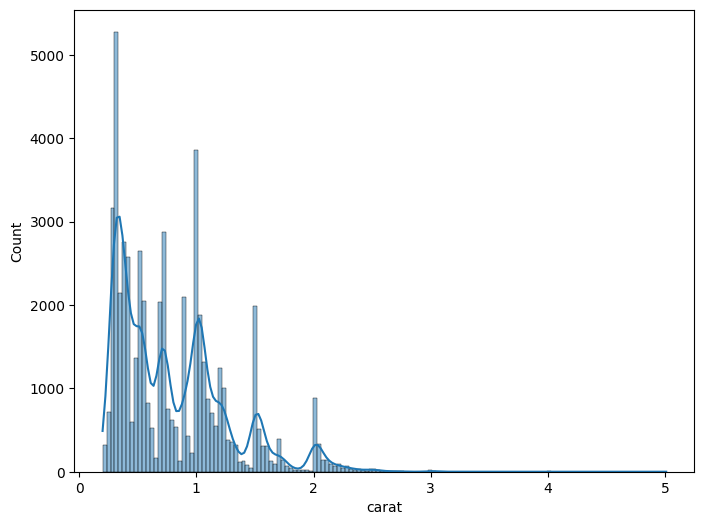

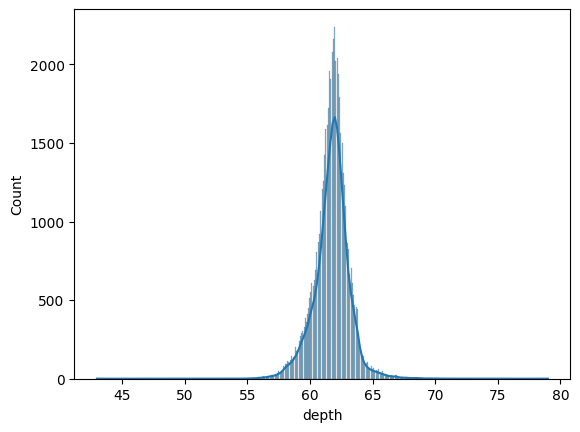

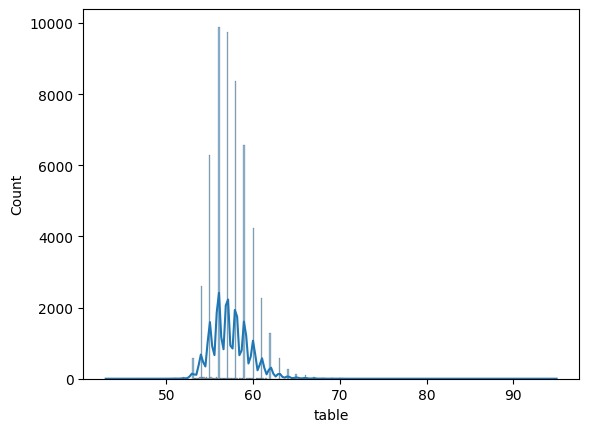

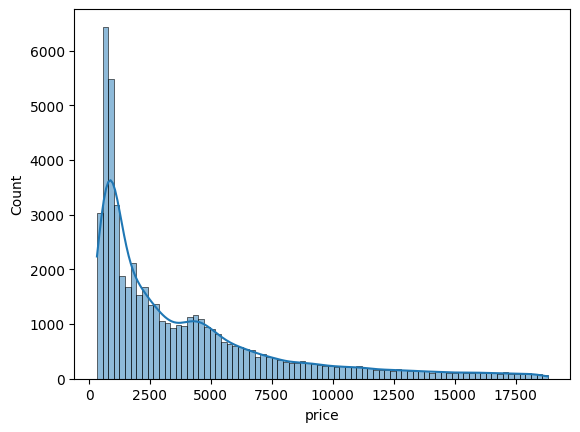

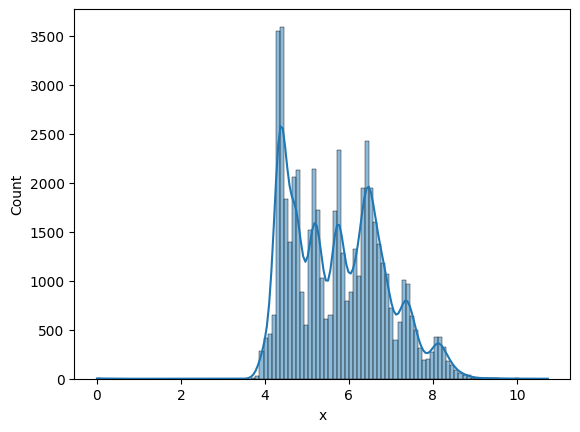

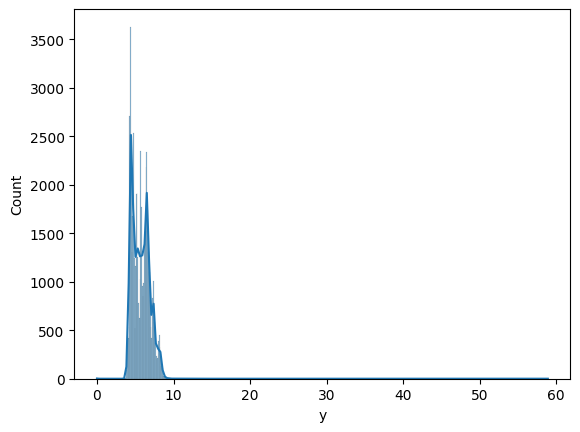

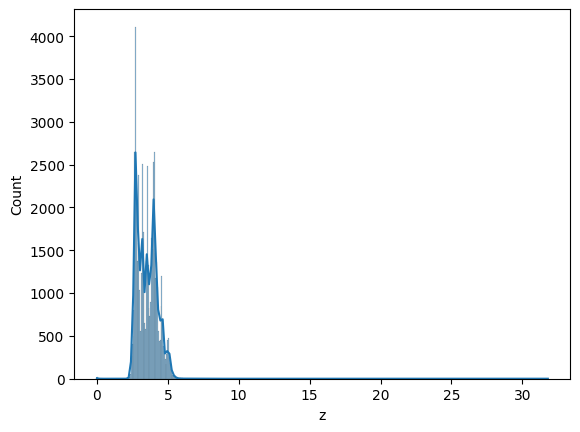

In [18]:
plt.figure(figsize=(8, 6))
for col in num_cols:
    sns.histplot(x=col, data=data, kde=True)
    print("\n")
    plt.show()

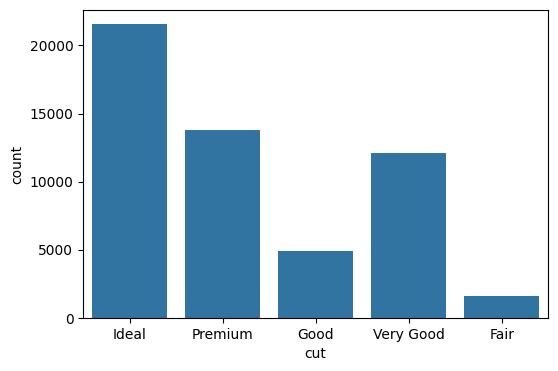

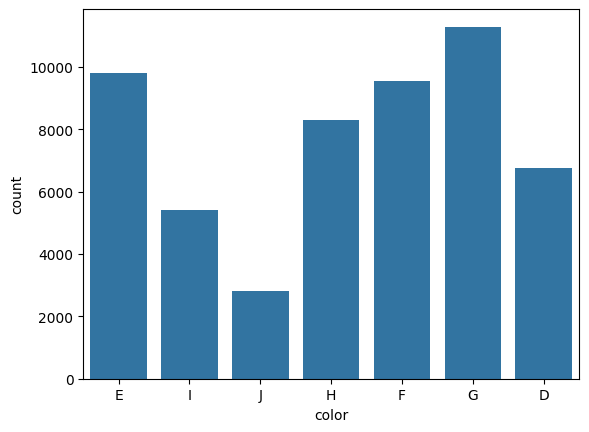

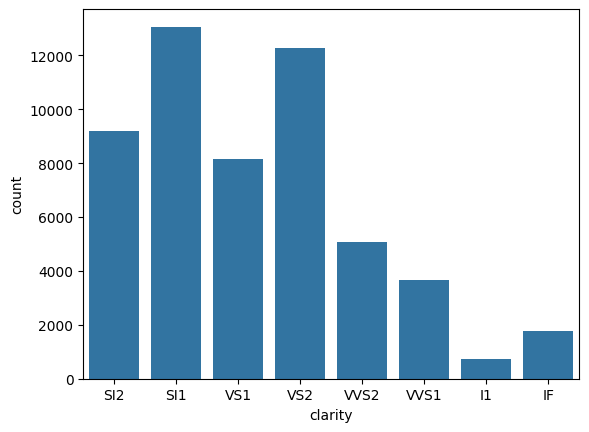

In [19]:
plt.figure(figsize=(6, 4))
for col in cat_cols:
    sns.countplot(data=data, x=col)
    print("\n")
    plt.show()

<Axes: >

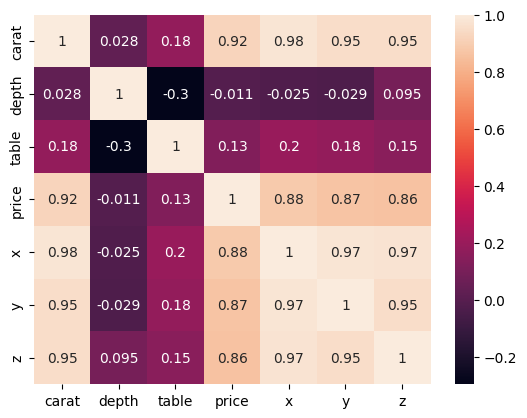

In [20]:
# Let us check the relationship in the dataset
sns.heatmap(data[num_cols].corr(), annot=True)

In [21]:
# Observations from EDA

# Feature Engineering

In [22]:
data.clarity.value_counts()

clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [23]:
# Encode the categorical features(Ordinal)
# Cut quality is increasing order Fair, Good, Very Good, Premium, Ideal.
cut_map = {"Ideal": 5, "Premium": 4, "Very Good": 3, "Good": 2, "Fair": 1}
color_map = {"D": 7, "E": 6, "F": 5, "G": 4, "H": 3, "I": 2, "J": 1}
clarity_map = {"IF": 8, "VVS1": 7, "VVS2": 6,
               "VS1": 5, "VS2": 4, "SI1": 3, "SI2": 2, "I1": 3}

In [24]:
data["cut"] = data["cut"].map(cut_map)
data["color"] = data["color"].map(color_map)
data["clarity"] = data["clarity"].map(clarity_map)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
